<a href="https://colab.research.google.com/github/amirmafzali/Neural_network-and-deep-learning_course/blob/main/DCGAN_finger%20number_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import time 
import imageio
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from numpy.random import randn
from numpy.random import randint
import tensorflow as tf
import cv2
import keras
from sklearn.model_selection import train_test_split

# Reading **Images**

In [17]:
folder_dir = '/content/data1' 
a = [1,2,3,4,5]

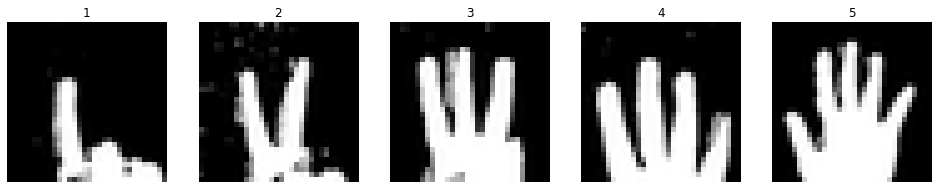

In [18]:
plt.figure(figsize=(20,20))
for i in a:
    plt.subplot(1, 6, i + 1)
    img = cv2.imread(folder_dir + '/' + str(i) + '/0.png',cv2.IMREAD_GRAYSCALE)
    plt.imshow(img,cmap='gray')
    plt.title(i)
    plt.axis('off')

In [19]:
images = []
for i in range(5):
  for j in range(201):
    img = cv2.imread(folder_dir + '/' + str(i+1) + '/' + str(j) + '.png',cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)
images = np.array(images).astype('float32')
images = images / 255
images = (images*2) - 1
images.shape

(1005, 32, 32)

# **Discriminator**

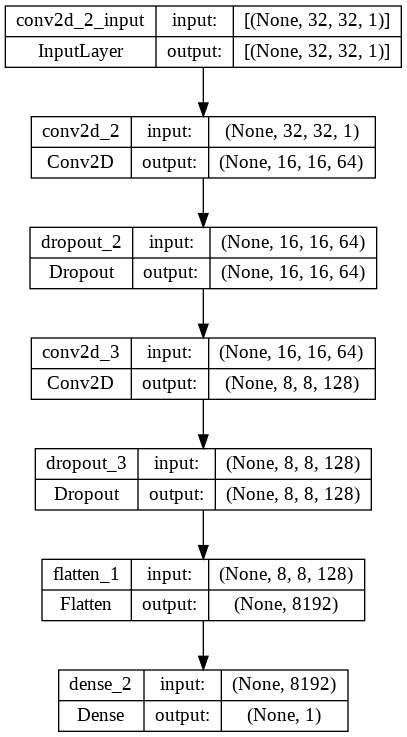

In [20]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(),
                        input_shape=[32, 32, 1]))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU()))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))
tf.keras.utils.plot_model(model=discriminator, show_shapes=True)

# **Generator**

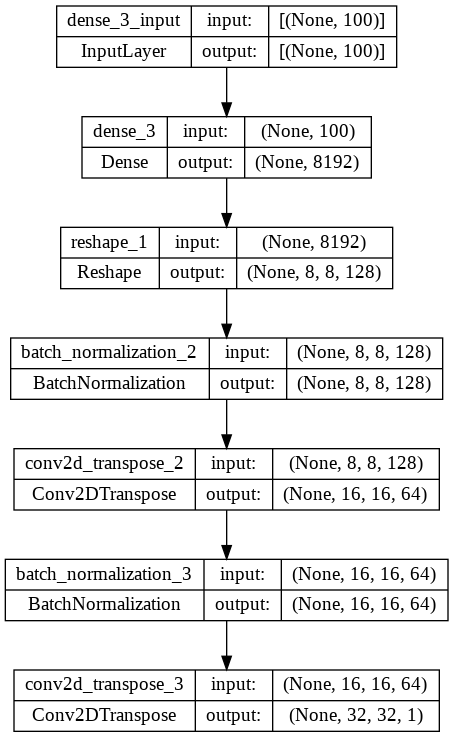

In [21]:
generator = Sequential()
generator.add(Dense(8 * 8 * 128, input_shape=[100]))
generator.add(Reshape([8, 8, 128]))
generator.add(keras.layers.BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(keras.layers.BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))
tf.keras.utils.plot_model(model=generator, show_shapes=True)

# **DCGAN model**

In [22]:
dcgan =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False
dcgan.compile(optimizer='adam',loss='binary_crossentropy')

# **Training**

Epoch =  1
1/1 [==============================] - 0s 106ms/step


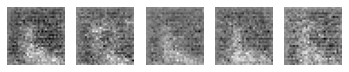

Epoch =  51
1/1 [==============================] - 0s 14ms/step


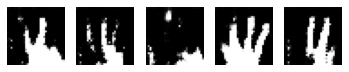

Epoch =  101
1/1 [==============================] - 0s 14ms/step


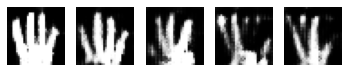

Epoch =  151
1/1 [==============================] - 0s 14ms/step


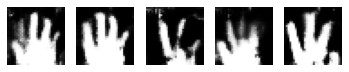

Epoch =  201
1/1 [==============================] - 0s 13ms/step


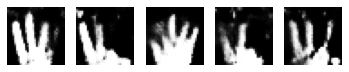

Epoch =  251
1/1 [==============================] - 0s 14ms/step


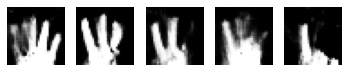

Epoch =  301
1/1 [==============================] - 0s 13ms/step


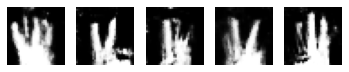

Epoch =  351
1/1 [==============================] - 0s 13ms/step


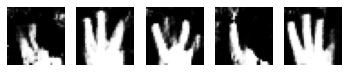

Epoch =  401
1/1 [==============================] - 0s 13ms/step


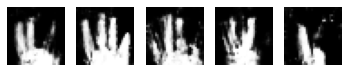

Epoch =  451
1/1 [==============================] - 0s 14ms/step


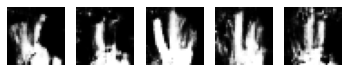

Epoch =  501
1/1 [==============================] - 0s 14ms/step


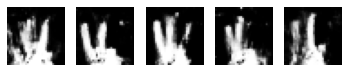

Epoch =  551
1/1 [==============================] - 0s 14ms/step


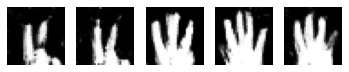

Epoch =  601
1/1 [==============================] - 0s 16ms/step


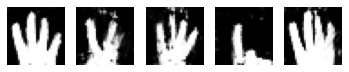

Epoch =  651
1/1 [==============================] - 0s 14ms/step


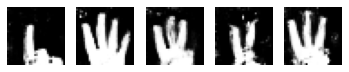

Epoch =  701
1/1 [==============================] - 0s 13ms/step


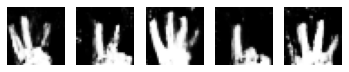

Epoch =  751
1/1 [==============================] - 0s 13ms/step


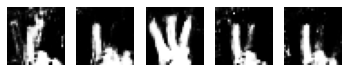

Epoch =  801
1/1 [==============================] - 0s 14ms/step


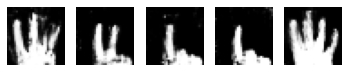

Epoch =  851
1/1 [==============================] - 0s 13ms/step


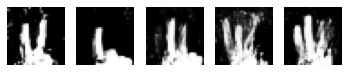

Epoch =  901
1/1 [==============================] - 0s 14ms/step


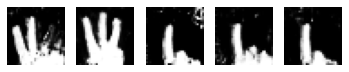

Epoch =  951
1/1 [==============================] - 0s 15ms/step


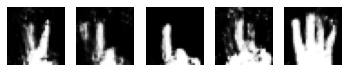

In [8]:
epochs = 1000
batch_size = 100
noise_shape=100
loss_disc = []
loss_gen = []
accu_real_disc = []
accu_fake_disc = []

for epoch in range(epochs):
  for i in range(images.shape[0]//batch_size):
    noise = np.random.normal(size=[batch_size,noise_shape])
    fake_image = generator.predict_on_batch(noise)
    real_image = images[i*batch_size:(i+1)*batch_size]
    real_image = images[i*batch_size:(i+1)*batch_size]
    real_image_label = np.ones(shape=(batch_size,1))
    discriminator.trainable=True
    disc_real_data_loss = discriminator.train_on_batch(real_image,real_image_label)
    fake_image_label = np.zeros(shape=(batch_size,1))
    disc_fake_data_loss = discriminator.train_on_batch(fake_image,fake_image_label)
    discriminator.trainable=False
    gen_loss = dcgan.train_on_batch(noise,real_image_label)
    disc_accu_real = discriminator.evaluate(real_image,real_image_label,verbose=0)
    disc_accu_fake = discriminator.evaluate(fake_image,fake_image_label,verbose=0)
  loss_disc.append(0.5*(disc_real_data_loss + disc_fake_data_loss))
  loss_gen.append(gen_loss)
  accu_real_disc.append(disc_accu_real*100)
  accu_fake_disc.append(disc_accu_fake*100)
  if epoch%50 == 0:
    print('Epoch = ',str(epoch+1))
    fake_image = generator.predict(np.random.normal(size=(5,100)))
    for k in range(5):
      plt.subplot(1,5,k+1)
      plt.imshow(fake_image[k].reshape(32,32),cmap='gray')
      plt.axis('off')
    plt.show()

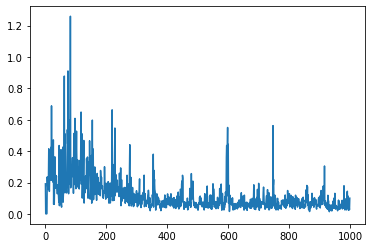

In [9]:
plt.plot(loss_disc)

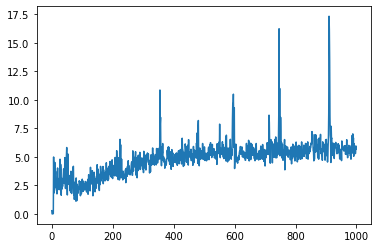

In [10]:
plt.plot(loss_gen)

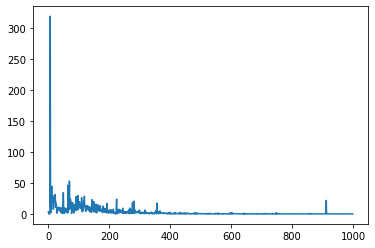

In [11]:
plt.plot(accu_real_disc)

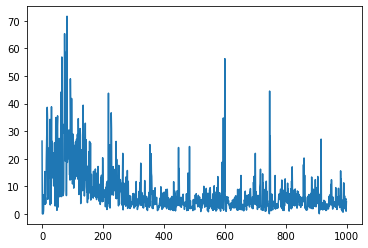

In [12]:
plt.plot(accu_fake_disc)

# **Add Noise**

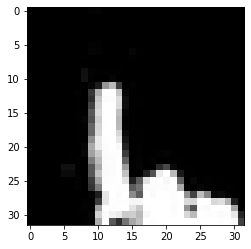

In [13]:
real = images[0:100]
plt.imshow(real[0].reshape(32,32),cmap='gray')

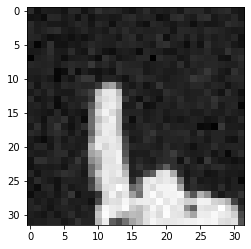

In [14]:
noise_t  = tf.random.normal(shape = (100,32,32), mean=0, stddev=np.random.uniform(0.0, 0.1), dtype=tf.float32)
noise_t = np.array(noise_t)
noisy = real + noise_t
plt.imshow(noisy[0].reshape(32,32),cmap='gray')

# Training with adding **noise** and **label smoothing**

Epoch =  1
1/1 [==============================] - 0s 81ms/step


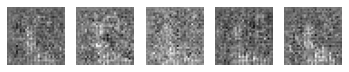

Epoch =  51
1/1 [==============================] - 0s 14ms/step


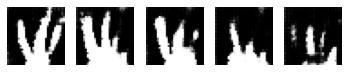

Epoch =  101
1/1 [==============================] - 0s 15ms/step


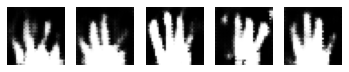

Epoch =  151
1/1 [==============================] - 0s 14ms/step


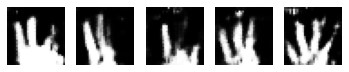

Epoch =  201
1/1 [==============================] - 0s 14ms/step


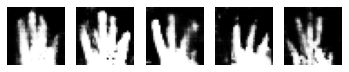

Epoch =  251
1/1 [==============================] - 0s 15ms/step


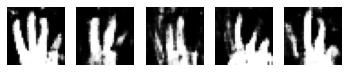

Epoch =  301
1/1 [==============================] - 0s 15ms/step


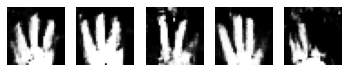

Epoch =  351
1/1 [==============================] - 0s 16ms/step


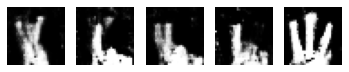

Epoch =  401
1/1 [==============================] - 0s 14ms/step


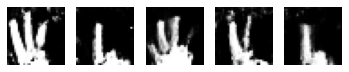

Epoch =  451
1/1 [==============================] - 0s 17ms/step


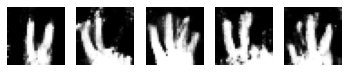

Epoch =  501
1/1 [==============================] - 0s 14ms/step


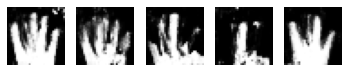

Epoch =  551
1/1 [==============================] - 0s 14ms/step


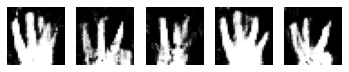

Epoch =  601
1/1 [==============================] - 0s 16ms/step


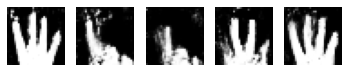

Epoch =  651
1/1 [==============================] - 0s 13ms/step


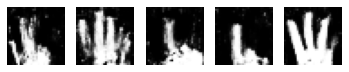

Epoch =  701
1/1 [==============================] - 0s 14ms/step


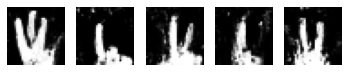

Epoch =  751
1/1 [==============================] - 0s 13ms/step


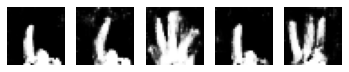

Epoch =  801
1/1 [==============================] - 0s 13ms/step


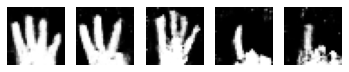

Epoch =  851
1/1 [==============================] - 0s 13ms/step


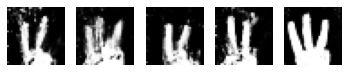

Epoch =  901
1/1 [==============================] - 0s 14ms/step


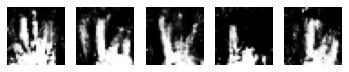

Epoch =  951
1/1 [==============================] - 0s 19ms/step


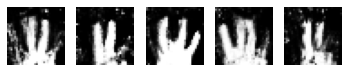

In [23]:
epochs = 1000
batch_size = 100
noise_shape=100
loss_disc = []
loss_gen = []
accu_real_disc = []
accu_fake_disc = []

for epoch in range(epochs):
  for i in range(images.shape[0]//batch_size):
    noise = np.random.normal(size=[batch_size,noise_shape])
    fake_image = generator.predict_on_batch(noise)
    real_image = images[i*batch_size:(i+1)*batch_size]
    noisy_real_image = images[i*batch_size:(i+1)*batch_size] + np.array(tf.random.normal(shape=(batch_size,32,32),mean=0.0,stddev=np.random.uniform(0.0, 0.1),dtype=tf.float32))
    real_image_label = np.ones(shape=(batch_size,1))*(1-0.2)+(0.2/2)
    discriminator.trainable=True
    disc_real_data_loss = discriminator.train_on_batch(noisy_real_image,real_image_label)
    fake_image_label = np.zeros(shape=(batch_size,1))*(1-0.2)+(0.2/2)
    disc_fake_data_loss = discriminator.train_on_batch(fake_image,fake_image_label)
    discriminator.trainable=False
    gen_loss = dcgan.train_on_batch(noise,real_image_label)
    disc_accu_real = discriminator.evaluate(real_image,real_image_label,verbose=0)
    disc_accu_fake = discriminator.evaluate(fake_image,fake_image_label,verbose=0)
  loss_disc.append(0.5*(disc_real_data_loss + disc_fake_data_loss))
  loss_gen.append(gen_loss)
  accu_real_disc.append(disc_accu_real*100)
  accu_fake_disc.append(disc_accu_fake*100)
  if epoch%50 == 0:
    print('Epoch = ',str(epoch+1))
    fake_image = generator.predict(np.random.normal(size=(5,100)))
    for k in range(5):
      plt.subplot(1,5,k+1)
      plt.imshow(fake_image[k].reshape(32,32),cmap='gray')
      plt.axis('off')
    plt.show()

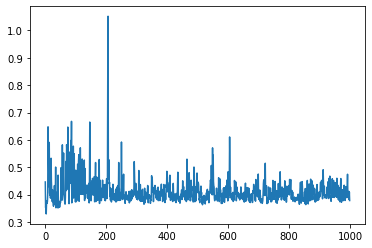

In [24]:
plt.plot(loss_disc)

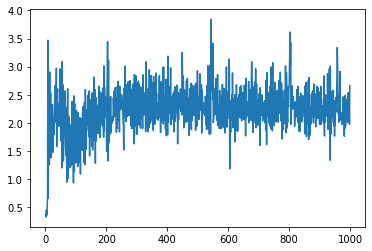

In [25]:
plt.plot(loss_gen)

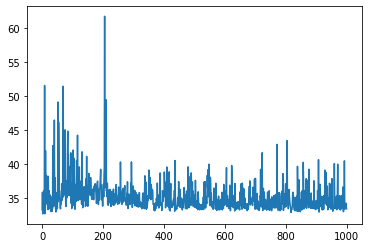

In [26]:
plt.plot(accu_real_disc)

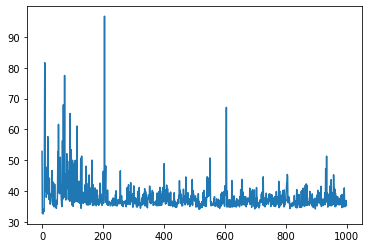

In [27]:
plt.plot(accu_fake_disc)